In [91]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math


In [92]:
data = pd.read_csv('Data/20210312/Obj1_RollPitchYaw_7.csv')

In [93]:
data

,Sample(20Hz),X_Pos,Y_Pos,Z_Pos,Roll,Pitch,Yaw
0,1,-0.1647,-0.0900,0.2476,3.0613,0.1054,1.1998
1,2,-0.1647,-0.0900,0.2476,3.0613,0.1054,1.1998
2,3,-0.1647,-0.0900,0.2476,3.0613,0.1054,1.1998
3,4,-0.1647,-0.0900,0.2476,3.0613,0.1054,1.1998
4,5,-0.1647,-0.0900,0.2476,3.0613,0.1054,1.1998
...,...,...,...,...,...,...,...
337,338,-0.3485,-0.2948,0.2060,2.1245,0.7172,1.7810
338,339,-0.3502,-0.2957,0.2061,2.1274,0.7155,1.7791
339,340,-0.3519,-0.2965,0.2062,2.1304,0.7136,1.7771
340,341,-0.3536,-0.2973,0.2063,2.1336,0.7117,1.7750


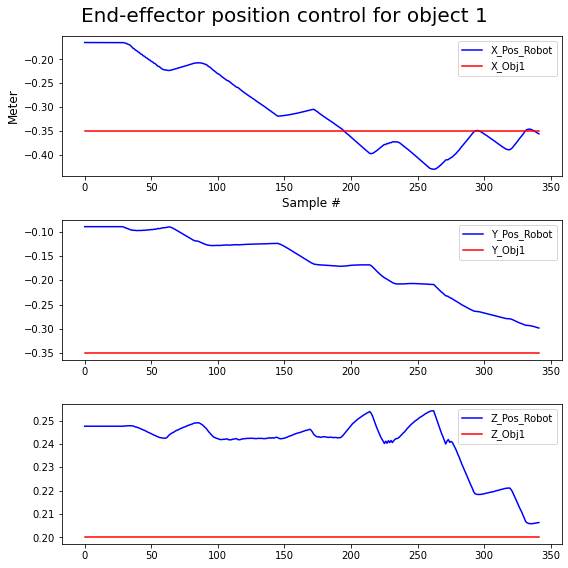

In [94]:
# ploting the position coordination of end-effector compared with object positions

%matplotlib inline

obj = 1
obj_pos = [-0.35, -0.35, 0.2]

#obj = 2
#obj_pos = [-0.64, 0, 0.2]

#obj = 3
#obj_pos = [-0.45, 0.45, 0.2]

# for testing
#obj = 4
#obj_pos = [-0.45, -0.45, 0.2]


ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector position control for object '+str(obj), fontsize=20)

for position in range(3):

    if position == 0:
        axes[position].plot(np.arange(len(data['X_Pos'])),data['X_Pos'],color=ListMarker[0], label='X_Pos_Robot')
        axes[position].plot(np.arange(len(data['X_Pos'])),np.ones(len(data['X_Pos']))*obj_pos[0],color=ListMarker[1],label='X_Obj'+str(obj))
        
        axes[position].set_xlabel('Sample #',fontsize=12)
        axes[position].set_ylabel('Meter',fontsize=12)
        axes[position].legend(loc=1)
        #axes[position].set_ylim([-1,1])

    elif position == 1:
        axes[position].plot(np.arange(len(data['Y_Pos'])),data['Y_Pos'],color=ListMarker[0],label='Y_Pos_Robot')
        axes[position].plot(np.arange(len(data['Y_Pos'])),np.ones(len(data['Y_Pos']))*obj_pos[1],color=ListMarker[1], label='Y_Obj'+str(obj))
        axes[position].legend(loc=1)
        #axes[position].set_ylim([-1,1])
        
    elif position == 2:
        axes[position].plot(np.arange(len(data['Z_Pos'])),data['Z_Pos'],color=ListMarker[0], label='Z_Pos_Robot')
        axes[position].plot(np.arange(len(data['Z_Pos'])),np.ones(len(data['Z_Pos']))*obj_pos[2],color=ListMarker[1], label='Z_Obj'+str(obj))
        axes[position].legend(loc=0)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
plt.savefig('./OfflineResults/PositionRollPitchRaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)

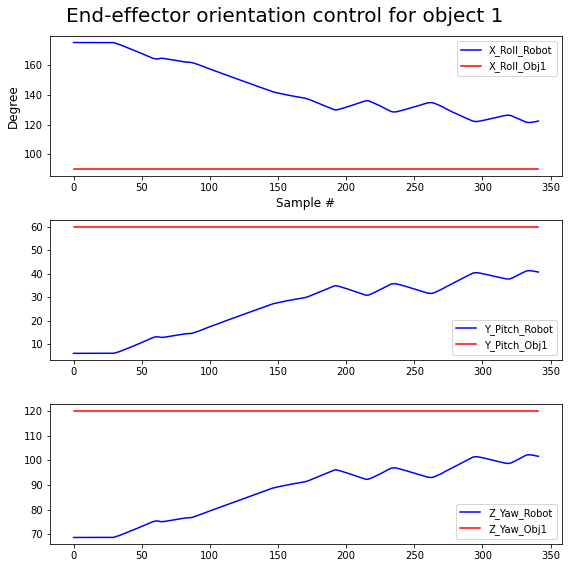

In [95]:
# ploting the orientation coordination of end-effector compared with object orientations

%matplotlib inline

obj = 1
obj_Orn = [math.pi/2, math.pi/3, 2*math.pi/3]

# for testing
#obj = 4
#obj_Orn = [-math.pi/3, 0, 0]

ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector orientation control for object '+str(obj), fontsize=20)

for Orn in range(3):

    if Orn == 0:
        axes[Orn].plot(np.arange(len(data['Roll'])),data['Roll']/math.pi*180,color=ListMarker[0], label='X_Roll_Robot')
        axes[Orn].plot(np.arange(len(data['Roll'])),np.ones(len(data['Roll']))*obj_Orn[0]/math.pi*180,color=ListMarker[1],label='X_Roll_Obj'+str(obj))
        
        axes[Orn].set_xlabel('Sample #',fontsize=12)
        axes[Orn].set_ylabel('Degree',fontsize=12)
        axes[Orn].legend(loc=0)
        #axes[position].set_ylim([-1,1])

    elif Orn == 1:
        axes[Orn].plot(np.arange(len(data['Pitch'])),data['Pitch']/math.pi*180,color=ListMarker[0],label='Y_Pitch_Robot')
        axes[Orn].plot(np.arange(len(data['Pitch'])),np.ones(len(data['Pitch']))*obj_Orn[1]/math.pi*180,color=ListMarker[1], label='Y_Pitch_Obj'+str(obj))
        axes[Orn].legend(loc=0)
        #axes[position].set_ylim([-1,1])
        
    elif position == 2:
        axes[Orn].plot(np.arange(len(data['Yaw'])),data['Yaw']/math.pi*180,color=ListMarker[0], label='Z_Yaw_Robot')
        axes[Orn].plot(np.arange(len(data['Yaw'])),np.ones(len(data['Yaw']))*obj_Orn[2]/math.pi*180,color=ListMarker[1], label='Z_Yaw_Obj'+str(obj))
        axes[Orn].legend(loc=0)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
plt.savefig('./OfflineResults/OrientationRollPitchYaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)